In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/cs4262/EmotionDetection # Change to your own path to the project

/content/gdrive/MyDrive/cs4262/EmotionDetection


In [ ]:
pip install -r requirements.txt

In [ ]:
%cd /content/gdrive/MyDrive/cs4262/EmotionDetection/datasets # Change to your own path to /datasets

/content/gdrive/MyDrive/cs4262/EmotionDetection/datasets


In [ ]:
ls -l

total 1803
-rw------- 1 root root     171 Mar  3 00:31 getDataset.sh
-rw------- 1 root root  372902 Mar  3 00:31 test_data.csv
-rw------- 1 root root 1471961 Mar  3 00:31 train_data.csv


In [ ]:
!chmod +x getDataset.sh

In [ ]:
! bash getDataset.sh

Streaming output truncated to the last 5000 lines.
Extracting  processedDataset/train/sad/Training_10883978_N95.jpg          79%  OK 
Extracting  processedDataset/train/sad/Training_10926620_N95.jpg          79%  OK 
Extracting  processedDataset/train/sad/Training_10963954_N95.jpg          79%  OK 
Extracting  processedDataset/train/sad/Training_10984846_N95.jpg          79%  OK 
Extracting  processedDataset/train/sad/Training_11036409_N95.jpg          79%  OK 
Extracting  processedDataset/train/sad/Training_11080278_N95.jpg          79%  OK 
Extracting  processedDataset/train/sad/Training_11084787_N95.jpg          79%  OK 
Extracting  processedDataset/train/sad/Training_11106902_N95.jpg          79%  OK 
Extracting  processedDataset/train/sad/Training_11108167_N95.jpg          79%  OK 
Extracting  processedDataset/train/sad/Training_11112803_N95.jpg          80%  OK 
Extracting  processedDataset/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load training data from CSV
train_df = pd.read_csv("/content/gdrive/MyDrive/cs4262/EmotionDetection/datasets/train_data.csv") # Replace with your own path to train_data.csv

# Load testing data from CSV
test_df = pd.read_csv("/content/gdrive/MyDrive/cs4262/EmotionDetection/datasets/test_data.csv") # Replace with your own path to test_data.csv

# Load images and labels from training data
train_images = []
train_labels = []

for index, row in train_df.iterrows():
    image = load_img(row['trainSet'], target_size=(32, 32))  # Adjust target_size as needed
    image = img_to_array(image) / 255.0  # Normalize pixel values
    train_images.append(image)
    train_labels.append(row['trainLabel'])

train_images = np.array(train_images)

# Label encoding
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels = to_categorical(train_labels_encoded)  # One-hot encode labels

# Load images and labels from testing data
test_images = []
test_labels = []

for index, row in test_df.iterrows():
    image = load_img(row['testSet'], target_size=(32, 32))  # Adjust target_size as needed
    image = img_to_array(image) / 255.0  # Normalize pixel values
    test_images.append(image)
    test_labels.append(row['testabel'])

test_images = np.array(test_images)

# Label encoding for test labels
test_labels_encoded = label_encoder.transform(test_labels)
test_labels = to_categorical(test_labels_encoded)  # One-hot encode labels

# Split training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


In [ ]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64, shuffle=True),
                    steps_per_epoch=len(train_images) // 64,
                    epochs=100,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot the loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Epoch 1/100
281/281 [==============================] - 14s 41ms/step - loss: 1.8118 - accuracy: 0.2761 - val_loss: 1.8016 - val_accuracy: 0.2845
Epoch 2/100
281/281 [==============================] - 11s 40ms/step - loss: 1.7906 - accuracy: 0.2779 - val_loss: 1.7706 - val_accuracy: 0.2880
Epoch 3/100
281/281 [==============================] - 11s 38ms/step - loss: 1.7653 - accuracy: 0.2808 - val_loss: 1.7784 - val_accuracy: 0.2795
Epoch 4/100
281/281 [==============================] - 11s 38ms/step - loss: 1.7475 - accuracy: 0.2881 - val_loss: 1.7586 - val_accuracy: 0.2945
Epoch 5/100
281/281 [==============================] - 11s 40ms/step - loss: 1.7260 - accuracy: 0.3009 - val_loss: 1.7195 - val_accuracy: 0.3130
Epoch 6/100
194/281 [===================>..........] - ETA: 3s - loss: 1.7115 - accuracy: 0.3119

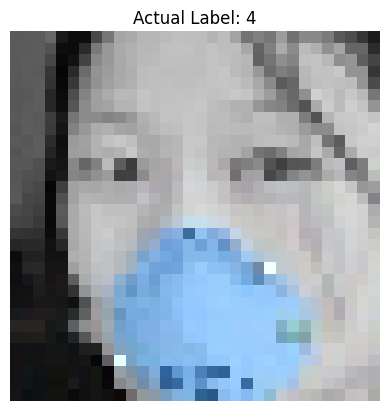

1/1 [==============================] - 0s 17ms/step
Predicted Label: Happy, Confidence: 0.4699896275997162


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate a random index to select a random image from the test dataset
image_index = random.randint(0, len(test_images) - 1)

# Selected the random image and its corresponding label
selected_image = test_images[image_index]
selected_label = np.argmax(test_labels[image_index])

# Display the random image
plt.imshow(selected_image)
plt.axis('off')
plt.title(f'Actual Label: {selected_label}')
plt.show()

# Make a prediction on the selected image
prediction = model.predict(np.expand_dims(selected_image, axis=0))
predicted_label = np.argmax(prediction)
confidence = np.max(prediction)

# Mapping from label indices to class names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral',
               'Sad', 'Surprise']

# Display the model's prediction with the name of the animal
print(f"Predicted Label: {class_names[predicted_label]}, Confidence: {confidence}")
